# Linear Regression 

In the previous notebook we prepared the stock data. Now we will use it to build a regression model to predict stock returns. We will look at our first algorithm - Multifactor Linear Regression (MLR) - where we will simultaneously take you through the model building process in python using Scikit Learn. 

## What is a Multifactor Linear Regression Model?

A **multifactor linear model** has the form:

$$Y~=~\beta_0+\beta_1X_1+\beta_2X_2+...+\beta_pX_p+error$$

where $X_i$ is the i'th feature (predictor) and $\beta_i$ is the coefficient of the i'th feature.

We fit a model to predict $Y$ by estimating values for all the coefficients. 

The coefficients are estimated by minimizing the **least squares**:

$$\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

## Building a Multifactor Linear Regression Model

We will use Scikit Learn to build our multifactor linear model to predict stock returns. Building a model in Scikit Learn consist of the following steps: 
* Preprocessing of the data
* Training/fitting the model
* Predicting results
* Testing the output

We will go through each of the steps above. Let's start by importing the libraries we will need and read in the data.csv file we created in the previous notebook.

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [11]:
df = pd.read_csv('data.csv').drop('Unnamed: 0', axis=1)

In [12]:
df.head()

,Date,company,current_price,momentum,moving_average,moving_volatility,trading_range,target_return,exp_market_change,rates,...,Gross_profit,Operating_profit,Net_Profit,Issue_of_shares,Share_repurchase,Non_current_assets,Current_assets,Non_current_liabilities,Current_liabilities,net_cash_op_act
0,2010/02/17,Anglogold Ashanti Ltd,29500.0,-0.103343,30598.216667,1854.530002,850.550000,0.090136,-0.016852,7.08,...,329.5,431.7,317.9,3.9,3.9,732.8,237.2,220.7,454.3,959.6
1,2010/05/06,Anglogold Ashanti Ltd,31150.0,0.139982,28743.150000,1079.933674,697.066667,-0.053612,0.044321,6.58,...,239.3,141.3,115.0,0.3,0.0,741.4,188.0,221.0,396.3,816.6
2,2010/08/11,Anglogold Ashanti Ltd,31420.0,-0.026943,31682.016667,1388.464601,864.983333,0.050286,0.008204,6.42,...,381.9,-8.9,-136.0,2.6,0.0,719.6,203.3,306.8,328.0,1003.0
3,2010/11/10,Anglogold Ashanti Ltd,34987.0,0.096771,32142.716667,784.923382,705.033333,-0.060365,0.136024,5.65,...,400.9,138.2,44.3,559.6,0.0,753.0,248.5,412.7,197.5,1056.6
4,2011/02/16,Anglogold Ashanti Ltd,33230.0,-0.007586,32411.016667,1134.366223,629.016667,-0.061601,0.076571,5.53,...,407.9,197.8,40.4,3.1,3.1,779.3,172.3,444.2,97.4,1095.5


### Preprocessing

Preprocessing in sklearn involves:
* Manipulating the data
* Splitting the data into features and labels
* Transforming the data 
* Splitting the data into training and testing data.

We already did most of our heavy lifting in the previous tutorial, however there is still some work left.

Transforming the features (e.g. Normalizing/standardizing) is not always required for multifactor linear regression (although we will do so in the next tutorial, when we consider regularization techiniques to improve our model). So we will only split the data into features and labels and then into training and testing data. 

#### Features/Labels split

Features relate to the independent variables or predictors while labels relate to the dependent variable or target.

In [13]:
# Lables
y = df['target_return']

# Features
X = df.drop(['Date', 'company', 'target_return'], axis=1)

We can use the shape method to see the number of rows and columns (features) in our features data.

In [14]:
X.shape

(362, 19)

#### Train/Test split

Next we are going to split our data into training and testing data. We do this to fit our model using the training data while we test the output of our model on the testing (unseen) data. Ideally we want a model that has a good fit to both the training and the testing data, however this is rarely the case. The fit to the training data gives us an idea of the bias in the model while the fit to the testing data gives us an idea of the variance in the model.

**Bias** relates to the degree to which our model is an accurate representation of reality: for example, if the relationships between variables are very non-linear and we're using a linear model (such as multiple linear regression), then our model will have high bias. **Variance**, on the other hand, relates to how well our model generalizes to unseen data: a model with high variance will be very sensitive to changes in the training data set. A large part of the modelling challenge lies in understanding and optimising the so-called **bias-variance tradeoff**.

Now let's import the train_test_split method from sklearn.model_selection:

In [8]:
from sklearn.model_selection import train_test_split

Use the imported method to split the data:

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

### Training

Now with the data split we can use the training data to train the model - i.e. learn the optimal parameters used to predict future results.

We import LinearRegression from sklearn.linear_model.

In [19]:
from sklearn.linear_model import LinearRegression

Create an instance of the LinearRegression object so that we can use methods on it.

In [20]:
lm = LinearRegression()

Use the fit() method to train the model. Note that we only input the training data.

In [21]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Now that the model is trained, we can extract the parameters. The parameters consist of the intercept and the coefficients related to the features. These parameters can be used to predict future share returns given the features.

Intercept

In [22]:
lm.intercept_

0.23577102387826848

The **intercept** above can be interpreted as the expected stock return if all of the feature values are zero.

Coefficients

In [23]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
current_price,6.365389e-07
momentum,-2.155042e-02
moving_average,-5.965514e-07
moving_volatility,1.007698e-05
trading_range,-1.968718e-05
exp_market_change,-3.367112e-01
rates,-3.398462e-02
Revenue,-1.736386e-05
Cost_of_Sales,1.726277e-05
Gross_profit,1.727082e-05


A **coefficient** can be interpreted as the expected change in the stock return if the feature value increases by 1. For example the stock return is expected to increase by 0.095 if the momentum increased by 1 (i.e. -0.1 => 0.9).

The **sign of the coefficients** also gives us an indication of which way an increase or decrease in feature value affects our expected stock return. For example because the sign of revenue is positive it implies that we expect higher returns given higher revenue in the past quarter. Is this what we would expect?

Now that we have estimated all the parameters, lets look how good the fit is to the training data. We will look at the mean squared error (MSE) to assess the goodness of fit.

The **Mean Squared Error** is defined as:

$$MSE~=~\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

We start by importing the metrics module from sklearn.

In [24]:
from sklearn import metrics

MSE

In [25]:
# Get predictions for training data
fit_lm = lm.predict(X_train)

# Print MSE for models
print('MSE (train)')
print('Linear:', metrics.mean_squared_error(y_train, fit_lm))

MSE (train)
Linear: 0.0114570613511


### Predicting

The trained model can now be used to predict future stock returns. We use the predict() method on our model instance. Note that now we input the testing data => only the features since our model is already trained and now needs to predict the returns (labels).

In [26]:
predictions = lm.predict(X_test)

### Testing

Finally we test the accuracy of our predictions. To do this we compare our predictions with the labels of the testing dataset. Let's look at a graph of our predicted results vs. actual results.

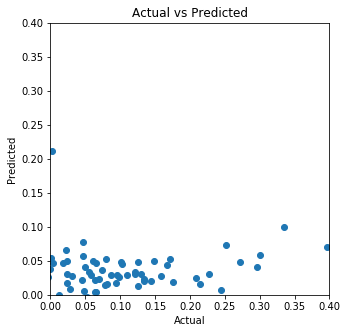

In [27]:
# Create figure and axes
f, ax = plt.subplots(figsize=(5,5))

# Plot on axes
ax.set_title('Actual vs Predicted')
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_xlim(0, 0.4)
ax.set_ylim(0, 0.4)
ax.scatter(y_test,predictions)

Next we look at some statistical measures to test our output. In this case we use MSE. A low MSE means that our model generalizes well to unseen data.

In [17]:
print('MSE:', metrics.mean_squared_error(y_test, predictions))

MSE: 0.024466891723910568


## Advantages & Disadvantages of Linear Regression

**Advantages**

* Very simple method and easy to understand 
* Able to determine the relative influence of one or more independent variables (features) to the dependent variable (labels)

**Disadvantages**

* Only valid if there exists a linear relationship between dependent (labels) and independent (features) variables
* Sensitive to outliers (i.e. outliers will impact estimated coefficients)

That's the end of this tutorial. We covered what a MLR model is, how to build it and how make future predictions using the Scikit Learn library in Python. In the next tutorial we will look at a technique to improve the MLR model.